Current testing:



## 4FUN Pierre bonus run decoding

In [1]:
from dataset import get_path, get_subjects, \
    read_raw, enrich_metadata, get_code_path, populate_metadata_epochs

from dataset import analysis_subject, analysis

import mne 

mne.set_log_level(verbose='error')

modality = "visual"
decoding_criterion = 'embeddings'
subject = '26'
start = 'onset'
level = 'constituent'


In [2]:
from dataset import epoch_on_selection, select_meta_subset
raw, meta_ = read_raw(subject, '00')
all_epochs=[]
meta = meta_.copy()

# Add information about constituents onsets, offsets, etc..
meta = enrich_metadata(meta)

# Select the subset needed for the level (filter on sentence/constituent)
sel = select_meta_subset(meta, level, decoding_criterion)

# Add the embeddings to the metadata limited to the level

epochs = epoch_on_selection(raw, sel, start, level)

all_epochs.append(epochs)

# Once we have the dict of epochs per condition full (epoching for each run for a subject)
# we can concatenate them, and fix the dev_head

# Concatenate epochs
if len(all_epochs) != 1:
    # Handle the case where there is only one run
    for epo in all_epochs:
        epo.info["dev_head_t"] = all_epochs[1].info["dev_head_t"]

epochs = mne.concatenate_epochs(all_epochs)

Reading raw files for modality: visual

 Epoching for run 00, subject: 26



In [3]:
from utils import decoding_from_criterion
all_scores = decoding_from_criterion(decoding_criterion, epochs, level, subject)

 constituent embeddings decoding
..........................

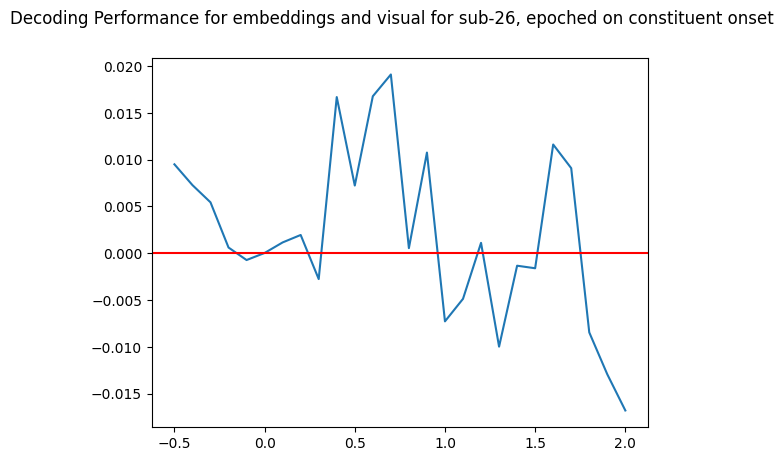

In [4]:
from dataset import unique_plot
import pandas as pd
unique_plot(subject, level, start, decoding_criterion, modality, from_scores=True, scores=pd.DataFrame(all_scores))

In [5]:
from dataset import get_path, get_subjects, \
    read_raw, enrich_metadata, get_code_path, populate_metadata_epochs

from dataset import analysis_subject, analysis

import mne 

mne.set_log_level(verbose='error')

modality = "visual"
decoding_criterion = 'embeddings'
subject = '26'
start = 'onset'
level = 'word'


from dataset import epoch_on_selection, select_meta_subset
raw, meta_ = read_raw(subject, '00')
all_epochs=[]
meta = meta_.copy()

# Add information about constituents onsets, offsets, etc..
meta = enrich_metadata(meta)

# Select the subset needed for the level (filter on sentence/constituent)
sel = select_meta_subset(meta, level, decoding_criterion)

# Add the embeddings to the metadata limited to the level

epochs = epoch_on_selection(raw, sel, start, level)

all_epochs.append(epochs)

# Once we have the dict of epochs per condition full (epoching for each run for a subject)
# we can concatenate them, and fix the dev_head

# Concatenate epochs
if len(all_epochs) != 1:
    # Handle the case where there is only one run
    for epo in all_epochs:
        epo.info["dev_head_t"] = all_epochs[1].info["dev_head_t"]

epochs = mne.concatenate_epochs(all_epochs)

from utils import decoding_from_criterion
all_scores = decoding_from_criterion(decoding_criterion, epochs, level, subject)

..............

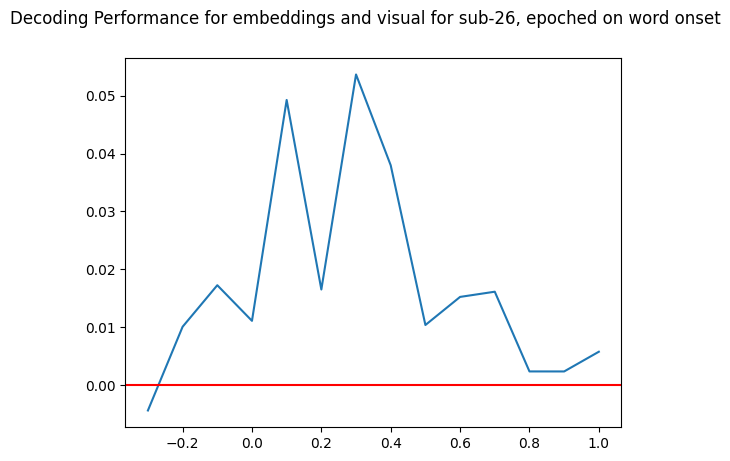

In [6]:
unique_plot(subject, level, start, decoding_criterion, modality, from_scores=True, scores=pd.DataFrame(all_scores))

# Testing

## Dataset functions


In [1]:
from dataset import get_path, get_subjects, \
    read_raw, enrich_metadata, get_code_path, populate_metadata_epochs

import mne 

mne.set_log_level(verbose='error')

### Path

In [2]:
modality = "visual"
decoding_criterion = 'embeddings'

path = get_path(modality)
subjects = get_subjects(path)

### Epoching and reading

In [5]:
subjects = get_subjects(path)
runs = 1
raw, meta = read_raw(subjects[0], runs)

Reading raw files for modality: visual

 Epoching for run 1, subject: 1



In [3]:
level = ('sentence')
start = ('onset')
decoding_criterion = 'embeddings'
runs = 1
epochs = populate_metadata_epochs(
    modality,
    subjects[0],
    level,
    start,
    runs,
    decoding_criterion
)


Reading raw files for modality: visual

 Epoching for run 1, subject: 1



### Metadata 

In [ ]:
meta_enriched = enrich_metadata(meta)


In [ ]:
meta_emb = add_embeddings(meta, runs, 'sentence')

### Analyses

In [13]:
scores = analysis_subject('5', modality, 'onset', 'sentence', 'embeddings', runs=2)

Reading raw files for modality: visual

 Epoching for run 1, subject: 5



KeyboardInterrupt: 

In [10]:
scores = analysis('5', modality, 'onset', 'sentence', 'embeddings')

TypeError: analysis() takes 2 positional arguments but 5 were given

## Utils functions

In [5]:
from utils import mne_events, decoding_from_criterion, add_syntax

In [ ]:
decoding_from_criterion('embeddings', epoch_add_metadata, starts, levels, subjects[0])

AttributeError: 'list' object has no attribute 'pick_types'

<Figure size 1280x800 with 0 Axes>

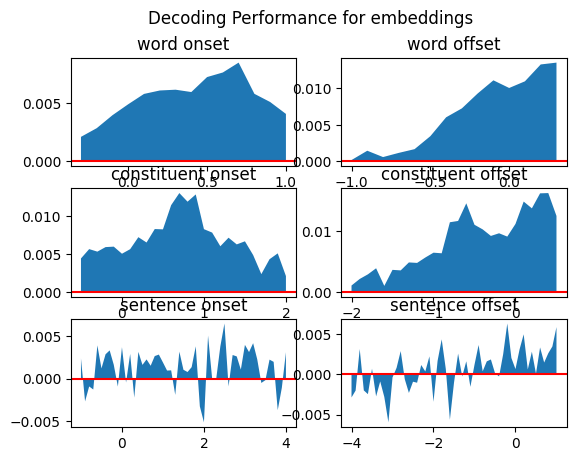

In [1]:
from dataset import plot_scores_debug
plot_scores_debug('auditory', 'embeddings')

<Figure size 1280x800 with 0 Axes>

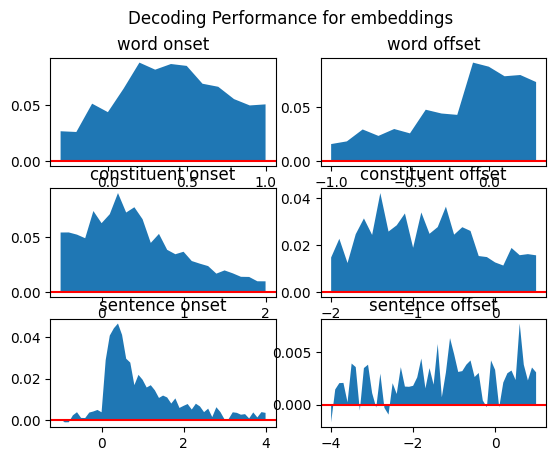

In [3]:
from dataset import plot_scores
modality = 'visual'; decoding = 'embeddings'
# load_scores('visual','embeddings')
plot_scores(modality, decoding)